## NFL Big Data Bowl 2021

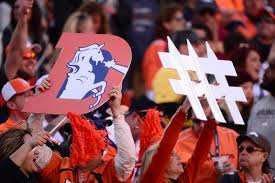

# **What combination of players makes a defense most effective?**

Do defenses need a key star player? Or can a defense with several solid but less frequent playmakers provide the same level of defensive performance as a team with one or a few standout players?

To address this question, we first need to define how we plan to measure defensive performance at the individual level and the team level.

## **Methodology**

Defenses and players can be evaluated on the basis of how many plays they make that help prevent the opposing offense from scoring.

For passing plays, defenses succeed by preventing the completion of passes that allow the opposing team to advance down the field and score. In our data set from the 2018 NFL regular season, we can quantify the number of pass plays that were disrupted, and we can categorize these plays as: incomplete passes, sacks, and interceptions.

We can quantify the number of these defensive play types that a given player participates in, and use that as an indication of their performance in each category of plays. In addition to these metrics, we can create a composite score that measures a player or defense’s overall performance in these play types. An **InSInc** score (**In**(terceptions), **S**(acks), **Inc**(ompletes)) can provide an overall summary measure of defensive performance. With this composite metric and the individual subcomponent metrics we can ask questions such as: 

We can then also ask questions such as:
-	Do players who perform well in one category (for example sacks?) perform equally well in the other areas? (i.e. Does a player who gets a lot of sacks, also frequently play a key role in plays that lead to incomplete passes?).
-	What combinations of players with different metrics result in defensive teams with high frequencies of plays where the pass is disrupted?

How do we quantify/measure player involvement in various play types from the data provided here?

-We can use text extraction to pull the names of players from the play description of defensive plays.

	-We can quantify the play types per defensive team and per individual player.



# Background Details

- drop back pass plays from 2018
- identify unique and impactful ways to measure defensive performance on these plays
- 32 NFL teams

# Results 

(note: we ran out of time but plan to continue developing our ideas)

What did we find?

Top Players Involved in Incomplete Pass Plays



Inc_Playmakers              Number of Incomplete Plays in 2018                 
K.Fuller                                  21
S.Gilmore                                 15
K.Jackson                                 14
M.Humphrey                                13
W.Jackson                                 13
J.Jackson                                 12
E.Apple                                   12
J.Bradberry                               12
J.Smith                                   11
B.Roby                                    11
B.Jones                                   11
R.Darby                                   11
R.Alford                                  11
T.Davis                                   11
J.Jenkins                                 11
D.Trufant                                 11
J.Alexander                               10
J.Peppers                                 10
J.Haden                                   10
S.Nelson                                  10
M.Claiborne                               10


# Appendix

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
week1=pd.read_csv('../input/nfl-big-data-bowl-2021/week1.csv')

In [ ]:
week1.head()

In [ ]:
plays=pd.read_csv('../input/nfl-big-data-bowl-2021/plays.csv')

In [ ]:
plays.head()

In [ ]:
plays.shape

on average, 40 pass attempts per game: https://www.teamrankings.com/nfl/stat/pass-attempts-per-game

In [ ]:
40*32*14

so 19,239 pass plays makes sense


How many of the plays are sacks?

In [ ]:
plays.passResult.value_counts()

In [ ]:
plays.playType.value_counts()

In [ ]:
sacks_plays_playType=plays[plays.playType=='play_type_sack']
sacks_plays_playType.head()

In [ ]:
plays_incomplete=plays[plays.passResult=='I']
plays_incomplete.head()

In [ ]:
incomplete_playmakers=[]
team=[]
for index,row in plays_incomplete.iterrows():
    text3=row['playDescription']
    start3 = text3.find(' (')
    end3 = text3.find(').')
    print(text3[start3+2:end3])
    #inc_playmaker=text3[start3+2:end3]
    #incomplete_playmakers.append(inc_playmaker)
    
    
    #add a second start and end for team name
    
    #team_name=
#incomplete_playmakers

In [ ]:
incomplete_playmakers=[]
team=[]
for index,row in plays_incomplete.iterrows():
    text3=row['playDescription']
    start3 = text3.find(' (')
    end3 = text3.find(').',start3)
    print(text3[start3+2:end3])
    inc_playmaker=text3[start3+2:end3]
    incomplete_playmakers.append(inc_playmaker)
    
    
    #add a second start and end for team name
    
    #team_name=
incomplete_playmakers

In [ ]:
incomplete_initial_extract=[]
incomplete_playmakers_v1=[]
team=[]
for index,row in plays_incomplete.iterrows():
    text3=row['playDescription']
    found=text3[-40:]
    #m=re.search('((?!Shotgun)?).',text3)
    #if m:
    #    found=m.group(1)
    print(found)
    init_ext=found
    incomplete_initial_extract.append(init_ext)
    start3 = found.find(' (')
    end3 = found.find(')',start3)
    print(found[start3+2:end3])
    inc_playmaker_edit1=found[start3+2:end3]
    incomplete_playmakers_v1.append(inc_playmaker_edit1)
    
    #inc_playmaker2=text3.find("")
    #add a second start and end for team name
    
    #team_name=
#incomplete_playmakers

In [ ]:
len(incomplete_playmakers_v1)

In [ ]:
plays_incomplete.head()

In [ ]:
incomplete_playmakers_v1

In [ ]:
incomplete_playmakers_v1_edit1=incomplete_playmakers_v1
incomplete_playmakers_v1_edit1[:]=[x for x in incomplete_playmakers_v1_edit1 if "to" not in x ]
len(incomplete_playmakers_v1_edit1)

In [ ]:
incomplete_playmakers_v1_edit1

In [ ]:
incomplete_playmakers_v1_edit2=incomplete_playmakers_v1_edit1
incomplete_playmakers_v1_edit2[:]=[x for x in incomplete_playmakers_v1_edit1 if "at" not in x ]
len(incomplete_playmakers_v1_edit2)

In [ ]:
incomplete_playmakers_v1_edit2

In [ ]:
incomplete_playmakers_v1_edit3=incomplete_playmakers_v1_edit2
incomplete_playmakers_v1_edit3[:]=[x for x in incomplete_playmakers_v1_edit2 if "pass" not in x ]
len(incomplete_playmakers_v1_edit3)

In [ ]:
incomplete_playmakers_v1_edit3

In [ ]:
incomplete_playmakers_v1_edit3_df=pd.DataFrame(incomplete_playmakers_v1_edit3,columns=['Inc_Playmakers'])
incomplete_playmakers_v1_edit3_df.head()

In [ ]:
incomplete_playmakers_v1_edit3_df.value_counts()

In [ ]:
len(incomplete_initial_extract)

In [ ]:
#sacks_plays_incomplete['playDescription']

In [ ]:
#sacks_plays_playType.shape

In [ ]:
game_data=pd.read_csv('../input/nfl-big-data-bowl-2021/games.csv')
game_data.shape

In [ ]:
game_data_inc_playType=pd.merge(plays_incomplete,game_data, on=['gameId'])
game_data_inc_playType.shape

In [ ]:
game_data_sacks_playType=pd.merge(sacks_plays_playType,game_data, on=['gameId'])
game_data_sacks_playType.shape

In [ ]:
game_data_sacks_playType.homeTeamAbbr.value_counts()

In [ ]:
game_data_sacks_playType.visitorTeamAbbr.value_counts()

In [ ]:
text=game_data_sacks_playType.playDescription[1:5]
text

In [ ]:
# m= re.search('yards ((.+?)).',text)
# if m:
#     found=m.group(1)
# found

In [ ]:
# start = text.find('yards (')
# end = text.find(').',start)
# print(text[start:end+1])

In [ ]:
for index,row in game_data_sacks_playType.iterrows():
    text=row['playDescription']
    start = text.find('yards (')
    end = text.find(').',start)
    print(text[start:end+1])

In [ ]:
sack_playmakers=[]
team=[]
for index,row in game_data_sacks_playType.iterrows():
    text=row['playDescription']
    start = text.find('yards (')
    end = text.find(').',start)
    print(text[start+7:end])
    playmaker=text[start+7:end]
    sack_playmakers.append(playmaker)
    
    
    #add a second start and end for team name
    
    #team_name=
sack_playmakers

In [ ]:
game_data_team_info_df=game_data_sacks_playType[['possessionTeam','homeTeamAbbr','visitorTeamAbbr']]
game_data_team_info_df.shape

In [ ]:
game_data_sacks_playType[game_data_sacks_playType['playDescription'].str.contains('C.Jones')]

In [ ]:
values,counts=np.unique(sack_playmakers, return_counts=True)
values,counts

Incomplete Plays

In [ ]:
#inc_game_data_team_info_df=game_data_sacks_playType[['possessionTeam','homeTeamAbbr','visitorTeamAbbr']]
#game_data_team_info_df.shape

In [ ]:
inc_combo_df=pd.DataFrame(incomplete_playmakers_v1,columns=['inc_playmakers'])
game_data_inc_playType_subset=game_data_inc_playType[['possessionTeam','homeTeamAbbr','visitorTeamAbbr']]
inc_combo_df_full=pd.concat([inc_combo_df,game_data_inc_playType_subset],axis=1)

inc_combo_df_full.shape

In [ ]:
inc_combo_df_full.head()

In [ ]:
inc_words_exclude=["to","at","pass"]
inc_combo_df_full_drop1=inc_combo_df_full[~inc_combo_df_full.inc_playmakers.isin(inc_words_exclude)]
inc_combo_df_full_drop1.shape

In [ ]:
inc_combo_df_full_drop1

In [ ]:
inc_combo_df_full_drop1.sort_valuesby['inc_playmakers'a]

In [ ]:
inc_combo_df_full_drop1.inc_playmakers.value_counts()


In [ ]:
inc_combo_df_full_drop1.groupby(by=['possessionTeam','homeTeamAbbr','visitorTeamAbbr','inc_playmakers'])['inc_playmakers'].count()

In [ ]:
inc_combo_df_full_drop1.groupby(by=['inc_playmakers',])['inc_playmakers'].count()

In [ ]:
sack_playmakers

In [ ]:
sack_playmakers_df=pd.DataFrame(sack_playmakers,columns=['Sack_Playmakers'])
#sack_playermakers_df=pd.concat([sack_playermakers_df,game_data_team_info_df],axis=1)
sack_playmakers_df['Sack_Playmakers'].value_counts()

In [ ]:
sack_playmakers_teams_df=pd.concat([sack_playmakers_df,game_data_team_info_df],axis=1)
sack_playmakers_teams_df

In [ ]:
sack_playmakers_teams_df['defenseTeam']=np.where(sack_playmakers_teams_df['possessionTeam']==sack_playmakers_teams_df['homeTeamAbbr'],sack_playmakers_teams_df['visitorTeamAbbr'],sack_playmakers_teams_df['homeTeamAbbr'])

In [ ]:
sack_playmakers_teams_df

In [ ]:
sack_playmakers_teams_df['defenseTeam'].value_counts()

In [ ]:
sack_playmakers_teams_df.groupby(['defenseTeam','Sack_Playmakers'])['Sack_Playmakers'].count()

In [ ]:
len(sack_playmakers_df['Sack_Playmakers'].unique())

In [ ]:
split_sacks=sack_playmakers_df[sack_playmakers_df['Sack_Playmakers'].str.contains('sack split')]
split_sacks.shape

In [ ]:
split_sacks.head()

In [ ]:
split_sack_names=[]
#team=[]
for index,row in split_sacks.iterrows():
    text1=row['Sack_Playmakers']
    start1 = text1.find('by ')
    end1 = text1.find(' and',start1)
    print(text1[start1+3:end1])
    first_split_playmaker=text1[start1+3:end1]
    split_sack_names.append(first_split_playmaker)
    
    start2 = text1.find('and ')
    #end2 = text1.find($,start2)
    print(text1[start2+4:])
    second_split_playmaker=text1[start2+4:]
    split_sack_names.append(second_split_playmaker)
    
    
    
    #add a second start and end for team name
    
    #team_name=
split_sack_names

In [ ]:
len(split_sack_names)

In [ ]:
sack_playmakers_single_df=sack_playmakers_df[~sack_playmakers_df['Sack_Playmakers'].str.contains('sack split')]
sack_playmakers_single_df.shape
#sack_playmakers1=sack_playmakers_single+split_sack_names
#sack_playmakers1

In [ ]:
split_sack_playmakers_df=pd.DataFrame(split_sack_names,columns=['Sack_Playmakers'])
split_sack_playmakers_df.head()

In [ ]:
split_sack_playmakers_df['Sack_Playmakers'].value_counts()

In [ ]:
sack_names_combined_df=pd.concat([sack_playmakers_single_df,split_sack_playmakers_df])
sack_names_combined_df.shape

In [ ]:
sack_names_combined_df

In [ ]:

sack_names_combined_df.value_counts()